# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# Build query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold response info
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:

    print(f"Processing Record | {city}")
   
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print(f"{city} not found. Skipping...")
        pass




Beginning Data Retrieval
------------------------
Processing Record | illoqqortoormiut
illoqqortoormiut not found. Skipping...
Processing Record | mizdah
Processing Record | airai
Processing Record | rikitea
Processing Record | mataura
Processing Record | punta arenas
Processing Record | tiznit
Processing Record | ushuaia
Processing Record | yulara
Processing Record | kapaa
Processing Record | kaitangata
Processing Record | qaanaaq
Processing Record | sioux lookout
Processing Record | omboue
Processing Record | lebu
Processing Record | saldanha
Processing Record | klaksvik
Processing Record | anadyr
Processing Record | ligayan
Processing Record | taolanaro
taolanaro not found. Skipping...
Processing Record | boundiali
Processing Record | vaini
Processing Record | upernavik
Processing Record | atuona
Processing Record | coihaique
Processing Record | fershampenuaz
Processing Record | bethel
Processing Record | bundaberg
Processing Record | nogliki
Processing Record | hilo
Processing Reco

Processing Record | fatikchhari
fatikchhari not found. Skipping...
Processing Record | severo-kurilsk
Processing Record | port elizabeth
Processing Record | jemnice
Processing Record | waimana
Processing Record | falealupo
falealupo not found. Skipping...
Processing Record | tateyama
Processing Record | cabo san lucas
Processing Record | chokurdakh
Processing Record | inta
Processing Record | nizwa
Processing Record | taitung
Processing Record | chagda
chagda not found. Skipping...
Processing Record | saleilua
saleilua not found. Skipping...
Processing Record | itoman
Processing Record | susurluk
Processing Record | kindu
Processing Record | leningradskiy
Processing Record | vao
Processing Record | wittingen
Processing Record | pijijiapan
Processing Record | jinchang
Processing Record | tambopata
Processing Record | kafar qasem
kafar qasem not found. Skipping...
Processing Record | belison
Processing Record | baruun-urt
Processing Record | maridi
Processing Record | bowen
Processing Re

Processing Record | pampas
Processing Record | oksovskiy
Processing Record | shimoda
Processing Record | naze
Processing Record | marrakesh
Processing Record | hihifo
hihifo not found. Skipping...
Processing Record | uvira
Processing Record | boditi
Processing Record | mys shmidta
mys shmidta not found. Skipping...
Processing Record | hurricane
Processing Record | binga
Processing Record | sovetskiy
Processing Record | cocora
Processing Record | paradwip
paradwip not found. Skipping...
Processing Record | mjolby
Processing Record | mugur-aksy
Processing Record | waw
Processing Record | okhansk
Processing Record | matamoros
Processing Record | lewiston
Processing Record | little current
Processing Record | salisbury
Processing Record | hudiksvall
Processing Record | burnie
Processing Record | exmouth
Processing Record | pestera
Processing Record | yertsevo
Processing Record | rio gallegos
Processing Record | kadykchan
kadykchan not found. Skipping...
Processing Record | mezen
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary so we can create a dataframe
weather_data = {
    "City": cities,
    "Latitude": lat,
    "Longitude": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

# Create dataframe
weather_data_df = pd.DataFrame.from_dict(weather_data, orient='index')
weather_data_df = weather_data_df.transpose()
weather_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,illoqqortoormiut,31.45,12.98,69.31,40,0,1.66,LY,1595730153
1,mizdah,-8.93,125.41,70.09,54,78,5.44,TL,1595730153
2,airai,-23.12,-134.97,70.48,80,18,20.94,PF,1595730153
3,rikitea,-46.19,168.86,52.63,68,42,6.04,NZ,1595730153
4,mataura,-53.15,-70.92,24.8,85,49,10.29,CL,1595730002
...,...,...,...,...,...,...,...,...,...
593,acarau,None,None,None,None,None,None,None,None
594,honningsvag,None,None,None,None,None,None,None,None
595,marzuq,None,None,None,None,None,None,None,None
596,smithers,None,None,None,None,None,None,None,None


In [5]:
# Export dataframe to csv
weather_data_df.to_csv(output_data_file)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data_df = weather_data_df[weather_data_df['Humidity'] <= 100]
clean_city_data_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,illoqqortoormiut,31.45,12.98,69.31,40,0,1.66,LY,1595730153
1,mizdah,-8.93,125.41,70.09,54,78,5.44,TL,1595730153
2,airai,-23.12,-134.97,70.48,80,18,20.94,PF,1595730153
3,rikitea,-46.19,168.86,52.63,68,42,6.04,NZ,1595730153
4,mataura,-53.15,-70.92,24.8,85,49,10.29,CL,1595730002
...,...,...,...,...,...,...,...,...,...
550,sassandra,-2.89,-40.12,77.04,80,86,11.88,BR,1595730232
551,kjollefjord,70.98,25.97,57.49,69,0,13.91,NO,1595730232
552,gorele,14.4,46.47,76.51,66,99,5.61,YE,1595730232
553,linxia,54.78,-127.17,64.4,63,90,10.29,CA,1595730232


In [7]:
# Export the City_Data into a csv
clean_city_data_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

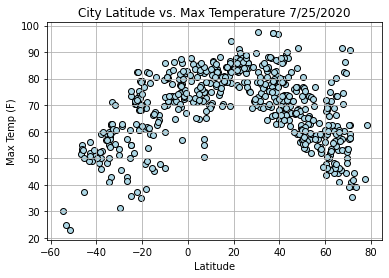

In [8]:
# Build scatter plot for latitude vs. temp
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Max Temp"], marker="o", facecolors="lightblue", edgecolors="black")

# Format scatter plot
plt.title("City Latitude vs. Max Temperature 7/25/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsMaxTemp.png")

plt.show()

## Latitude vs. Humidity Plot

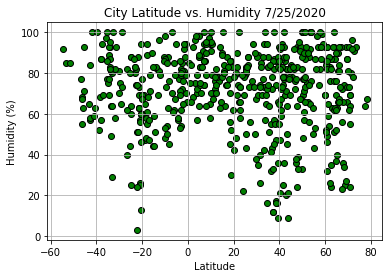

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity"], marker="o", facecolors="green", edgecolors="black")

# Format scatter plot
plt.title("City Latitude vs. Humidity 7/25/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsHumidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

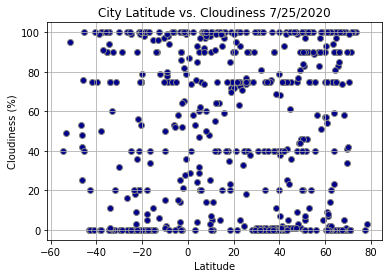

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloudiness"], marker="o", facecolors="darkblue", edgecolors="gray")

# Format scatter plot
plt.title("City Latitude vs. Cloudiness 7/25/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsCloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

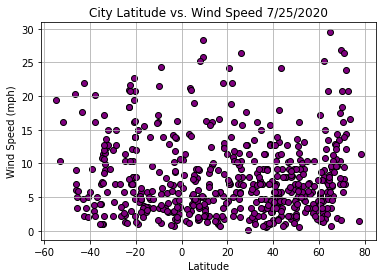

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed"], marker="o", facecolors="purple", edgecolors="black")

# Format scatter plot
plt.title("City Latitude vs. Wind Speed 7/25/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsWindSpeed.png")

plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [13]:
# Create Northern Hemisphere DataFrame
north_hemi_df = clean_city_data_df[clean_city_data_df['Latitude'] >= 0]
north_hemi_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,illoqqortoormiut,31.45,12.98,69.31,40,0,1.66,LY,1595730153
5,punta arenas,29.58,-9.5,70.18,67,0,1.61,MA,1595730154
8,yulara,22.08,-159.32,82.4,74,75,21.92,US,1595729993
10,kaitangata,77.48,-69.36,42.33,64,0,1.45,GL,1595730154
11,qaanaaq,50.1,-91.92,80.6,69,20,4.7,CA,1595730154
...,...,...,...,...,...,...,...,...,...
549,saint-vallier,46.43,26.4,60.01,92,100,2.15,RO,1595730232
551,kjollefjord,70.98,25.97,57.49,69,0,13.91,NO,1595730232
552,gorele,14.4,46.47,76.51,66,99,5.61,YE,1595730232
553,linxia,54.78,-127.17,64.4,63,90,10.29,CA,1595730232


In [14]:
# Create southern hemisphere dataframe
south_hemi_df = clean_city_data_df[clean_city_data_df['Latitude'] < 0]
south_hemi_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,mizdah,-8.93,125.41,70.09,54,78,5.44,TL,1595730153
2,airai,-23.12,-134.97,70.48,80,18,20.94,PF,1595730153
3,rikitea,-46.19,168.86,52.63,68,42,6.04,NZ,1595730153
4,mataura,-53.15,-70.92,24.8,85,49,10.29,CL,1595730002
6,tiznit,-54.8,-68.3,30.2,92,40,19.46,AR,1595729940
...,...,...,...,...,...,...,...,...,...
539,little current,-4.42,-41.46,68.65,58,15,0.83,BR,1595730231
542,burnie,-45.42,167.72,50.18,71,100,5.97,NZ,1595730231
544,pestera,-22.47,-68.93,37.4,3,0,20.8,CL,1595730228
548,mezen,-0.72,8.78,74.64,79,36,10.6,GA,1595730232


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.380007611759435


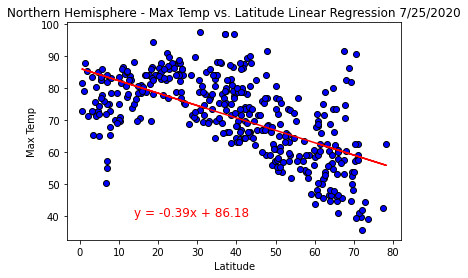

In [15]:
# Define x and y values
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Max Temp']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression 7/25/2020")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(14,40),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/NorthernHemiMaxTempVsLatLR.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4638683152419985


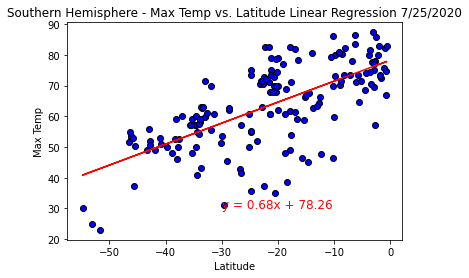

In [16]:
# Define x and y values
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Max Temp']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression 7/25/2020")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/SouthernHemiMaxTempVsLatLR.png")

plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013294365113354247


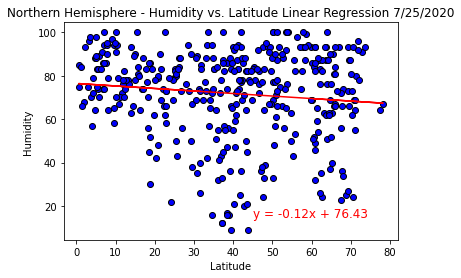

In [17]:
# Define x and y values
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Humidity']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression 7/25/2020")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/NorthernHemiHumidityVsLatLR.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0034282121480391065


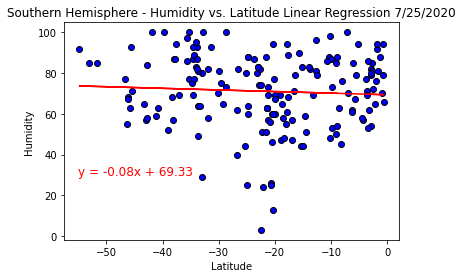

In [18]:
# Define x and y values
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Humidity']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression 7/25/2020")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/SouthernHemiHumidityVsLatLR.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005135048352147613


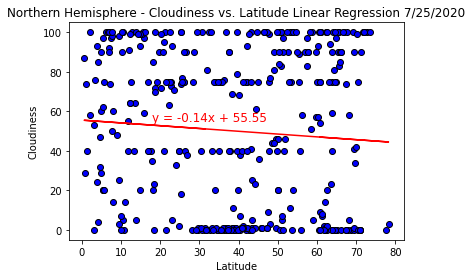

In [19]:
# Define x and y values
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Cloudiness']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression 7/25/2020")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,55),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/NorthernHemiCloudinessVsLatLR.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007025640992726661


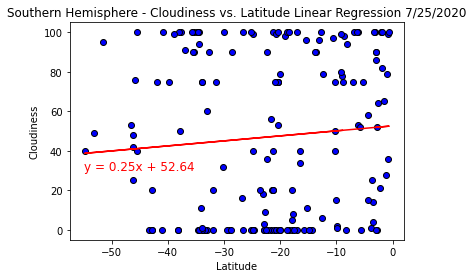

In [20]:
# Define x and y values
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Cloudiness']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression 7/25/2020")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/SouthernHemiCloudinessVsLatLR.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0033940963784707227


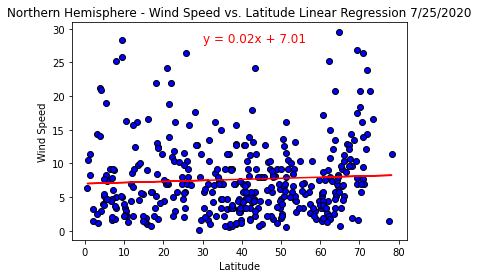

In [24]:
# Define x and y values
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Wind Speed']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression 7/25/2020")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,28),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/NorthernHemiWindSpeedVsLatLR.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01750183634794408


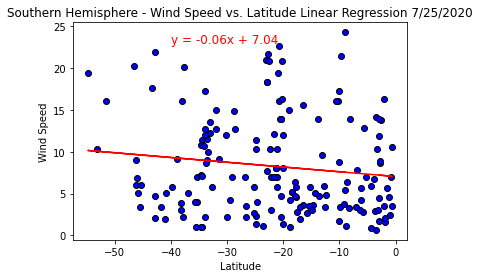

In [25]:
# Define x and y values
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Wind Speed']


# perform linear regression on max temp vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values.astype(float), y_values.astype(float))

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,marker="o",facecolors="blue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression 7/25/2020")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,23),fontsize=12,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/SouthernHemiWindSpeedVsLatLR.png")

plt.show()

# Observable Trends:
- As you move away from the equator (in both the Northern and Southern hemispheres), the max temp decreases steadily.
- Humidity slightly increases the closer to the equator, but not as quickly as the max temp rises.
- The wind speed does not vary much based on the closeness to the equator. There is a very slight variation between the two in that wind speed decreases very slightly closer to the equator.